In [12]:
# Imports
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


uni_data = pd.read_csv('universal_db.csv')

In [13]:
# Take a glimpse at the data
uni_data.head()

,UniversityID,UniversityName,ClassCode,WeekNumber,WeekPace,AcademicSupport,ConceptMastering,instructorEngagement,instructorClarity,instructorknowledgeable
0,29,NaN,Class 10,2,3,4,4,5.00,5.00,5.00
1,29,NaN,Class 10,2,5,3,3,5.00,5.00,5.00
2,29,NaN,Class 10,2,3,3,1,5.00,4.00,5.00
3,29,NaN,Class 10,2,5,5,4,5.00,5.00,5.00
4,29,NaN,Class 10,2,4,5,4,5.00,5.00,5.00


In [71]:
uni_data[['WeekPace','AcademicSupport','ConceptMastering','WeekPace','instructorClarity','instructorEngagement', 'instructorknowledgeable']].describe()



,WeekPace,AcademicSupport,ConceptMastering,WeekPace,instructorClarity,instructorEngagement,instructorknowledgeable
count,"50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00"
mean,3.74,4.16,3.33,3.74,4.12,4.21,4.49
std,0.90,0.91,1.11,0.90,0.97,0.89,0.84
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00
25%,3.00,4.00,3.00,3.00,4.00,4.00,4.00
50%,4.00,4.00,3.00,4.00,4.00,4.00,5.00
75%,4.00,5.00,4.00,4.00,5.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [15]:
pd.options.display.float_format = '{:,.2f}'.format

pd.to_numeric(uni_data.WeekNumber, errors='coerce')

uni_data = uni_data.fillna(0)

for col in ['WeekPace', 'AcademicSupport', 'ConceptMastering', 'instructorEngagement','instructorEngagement','instructorClarity','instructorknowledgeable']:
    uni_data[col] = uni_data[col].astype('float')
    uni_data[col] = round(uni_data[col],2) 


uni_data.dtypes

UniversityID                object
UniversityName              object
ClassCode                   object
WeekNumber                   int64
WeekPace                   float64
AcademicSupport            float64
ConceptMastering           float64
instructorEngagement       float64
instructorClarity          float64
instructorknowledgeable    float64
dtype: object

In [16]:

uni_data.pivot_table(values=['WeekNumber', 'WeekPace','AcademicSupport','ConceptMastering','instructorEngagement','instructorClarity','instructorknowledgeable'] ,index=['UniversityName', 'ClassCode'], 
                aggfunc= np.mean , fill_value=0)



AcademicSupport  ConceptMastering  WeekNumber  \
UniversityName ClassCode                                                  
0              Class 10              4.16              3.45        5.39   
               Class 11              4.33              3.53        5.42   
               Class 12              4.27              3.36        5.43   
               Class 14              4.12              3.23        5.44   
               Class 15              4.03              3.23        2.00   
               Class 19              4.36              3.39        4.97   
               Class 2               4.08              3.46        6.36   
               Class 20              4.39              3.43        4.77   
               Class 22              3.77              2.92        4.98   
               Class 25              4.27              3.62        2.00   
               Class 26              4.05              3.42        6.50   
               Class 27              4.48              3.59        2.00   
               Class 28              4.44              3.05        3.97   
               Class 29              4.37              3.34        3.49   
               Class 3               4.30              3.41        6.49   
               Class 30              4.40              3.52        4.45   
               Class 34              4.36              3.33        5.41   
               Class 35              4.50              3.68        2.00   
               Class 36              3.52              3.10        2.00   
               Class 37              4.68              3.54        2.00   
               Class 38              4.15              3.48        7.47   
               Class 39              3.92              4.08        7.50   
               Class 4               4.36              3.29        3.45   
               Class 43              4.72              3.65        2.48   
               Class 45              4.40              3.44        3.48   
               Class 5               4.42              3.68        6.33   
               Class 51              3.91              3.17        4.94   
               Class 58              3.78              3.26        4.93   
               Class 6               4.36              3.57        6.46   
               Class 61              3.76              2.95        5.50   
...                                   ...               ...         ...   
University 12  Class 3               4.16              3.42       10.39   
               Class 4               4.16              3.42       10.39   
               Class 42              4.03              3.36        4.50   
               Class 50              4.16              3.42       10.39   
               Class 51              4.16              3.42       10.39   
University 13  Class 71              4.21              3.35        9.44   
               Class 72              4.21              3.35        9.44   
University 14  Class 31              4.31              3.60       18.81   
               Class 55              4.15              3.42        4.00   
University 19  Class 8               4.21              3.39        6.49   
University 2   Class 90              4.13              3.30       10.00   
               Class 91              4.13              3.30       10.00   
               Class 92              4.13              3.30       10.00   
               Class 93              4.13              3.30       10.00   
               Class 96              4.13              3.30       10.00   
               Class 97              4.13              3.30       10.00   
University 21  Class 21              4.60              3.74        4.96   
               Class 44              4.65              3.49        3.50   
University 3   Class 23              4.15              3.36        9.36   
               Class 24              4.16              3.33        9.54   
               Class 25              4.16          

In [17]:
corr = uni_data.corr()

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


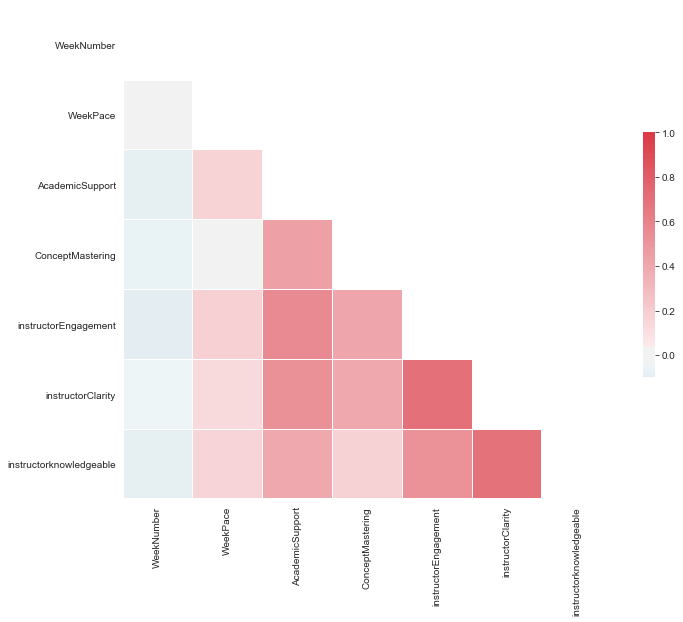

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

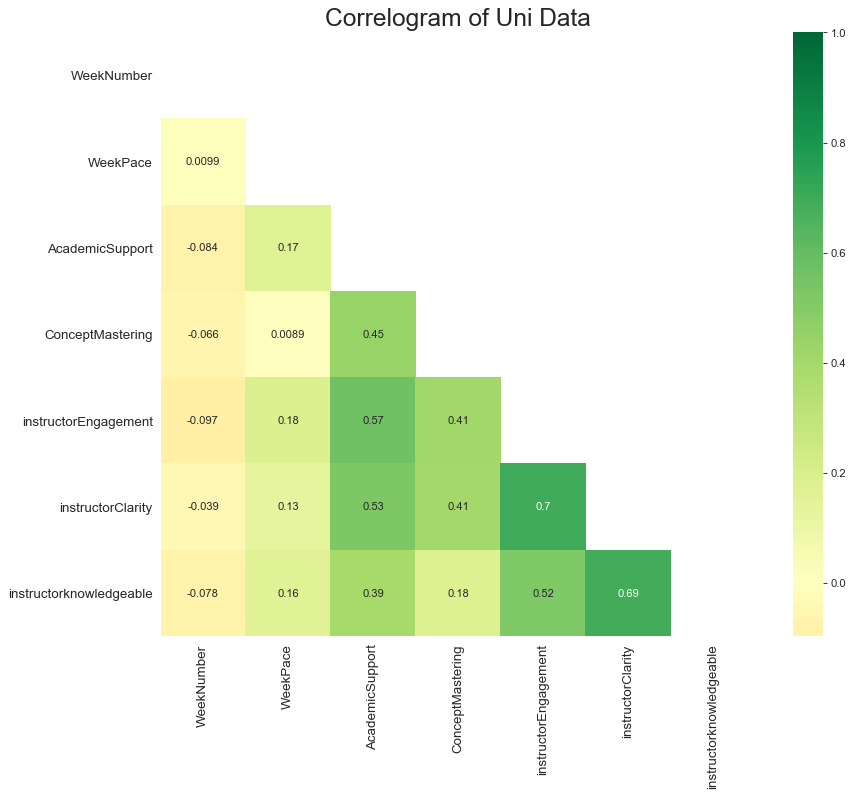

In [37]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(uni_data.corr(), mask=mask, xticklabels=uni_data.corr().columns, yticklabels=uni_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Uni Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
